In [1]:
import pandas as pd
import os 

### Task #1 :Mergin all the data Frames

In [2]:
DataFrames = []
for i in os.listdir(path="./Sales_Data"):
    DataFrames.append(pd.read_csv(str('./Sales_Data/')+i))
df = pd.concat(DataFrames)

In [4]:
df.to_csv('my_all_Data.csv',index=False)

### Question #1 : What was the best month for sales ? How much was earned that month ?

In [5]:
df = df.dropna()

In [8]:
mydf = df 

### Month Column

In [16]:
mydf['Month'] = mydf['Order Date'].map(lambda x: int(x.split('/')[0]) if x.split('/')[0].isdigit() else 0 )

In [20]:
mydf = mydf[mydf['Month'] != 0]

In [39]:
mydf.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4


### Added Earned by day Column

In [41]:
# mydf['earned_in_day'] = int(mydf['Price Each']) * int(mydf['Quantity Ordered'])
def Calc(row):
    return float(row[mydf.columns[3]]) * float(row['Quantity Ordered'])
mydf['earned_in_day'] = mydf.apply(Calc,axis=1)

<ipython-input-41-520165c136e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydf['earned_in_day'] = mydf.apply(Calc,axis=1)


## Answering the Question

In [46]:
rapport =[]
for i in mydf.Month.unique():
    SelectedMonth = mydf[mydf['Month'] == i]
    EarningMonth = SelectedMonth['earned_in_day'].sum()
    print(f'{i}th Month Earned : {EarningMonth}')
    rapport.append((i,EarningMonth))

4th Month Earned : 3390670.2399999993
5th Month Earned : 3152606.7499999995
8th Month Earned : 2244467.88
9th Month Earned : 2097560.13
12th Month Earned : 4613443.34
1th Month Earned : 1822256.73
2th Month Earned : 2202022.42
3th Month Earned : 2807100.38
7th Month Earned : 2647775.76
6th Month Earned : 2577802.26
11th Month Earned : 3199603.1999999997
10th Month Earned : 3736726.8799999994


In [56]:
def Hsort(val):
    return val[1]
rapport.sort(key=Hsort,reverse=True)
rapport[0]

(12, 4613443.34)

In [73]:
#Highest Earning Month is December with $4,6m
mydf = mydf.astype({'Price Each':'float'})

In [75]:
mydf.groupby('Month').sum().sort_values(by=['earned_in_day'],ascending=False)

,Price Each,earned_in_day
Month,,
12,4588415.41,4613443.34
10,3715554.83,3736726.88
4,3367671.02,3390670.24
11,3180600.68,3199603.20
5,3135125.13,3152606.75
3,2791207.83,2807100.38
7,2632539.56,2647775.76
6,2562025.61,2577802.26
8,2230345.42,2244467.88


In [78]:
import matplotlib.pyplot as plt

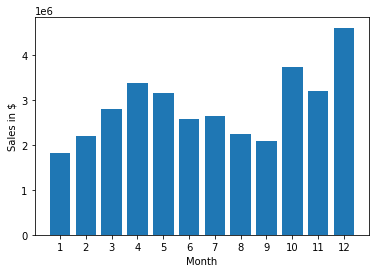

In [82]:
months = range(1,13)

plt.bar(months,mydf.groupby('Month').sum()['earned_in_day'])
plt.xticks(months)
plt.ylabel('Sales in $')
plt.xlabel('Month')
plt.show()

### Question #2 : What city sold the most product?

#### Adding City Column

In [96]:
mydf['City'] = mydf['Purchase Address'].map(lambda x: x.split(',')[1])

In [107]:
mydf.groupby('City').sum().sort_values(['earned_in_day'],ascending=False)

,Price Each,Month,earned_in_day
City,,,
San Francisco,8211461.74,315520,8262203.91
Los Angeles,5421435.23,208325,5452570.80
New York City,4635370.83,175741,4664317.43
Boston,3637409.77,141112,3661642.01
Atlanta,2779908.20,104794,2795498.58
Dallas,2752627.82,104620,2767975.40
Seattle,2733296.01,104941,2747755.48
Portland,2307747.47,87765,2320490.61
Austin,1809873.61,69829,1819581.75


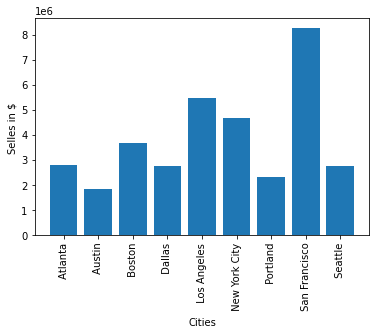

In [131]:
cities = mydf['City'].unique()
cities.sort()
plt.bar(cities,mydf.groupby('City').sum()['earned_in_day'])
plt.ylabel('Selles in $ ')
plt.xlabel('Cities')
plt.xticks(rotation="vertical")
plt.show()

### Question #3 : What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [136]:
mydf['Time'] = mydf['Order Date'].map(lambda x: x.split(' ')[1])

In [138]:
mydf.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,earned_in_day,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9,Dallas,08:46


In [142]:
mydf['pm/am'] = mydf['Time'].map(lambda x:  'am'  if int(x.split(':')[0]) <= 11 else 'pm')

In [144]:
mydf['Hour'] = mydf['Time'].map(lambda x: int(x.split(':')[0]))

In [150]:
mydf.groupby('Hour').sum().sort_values(by=['earned_in_day'],ascending=False)

,Price Each,Month,earned_in_day
Hour,,,
19,2398588.31,91389,2412938.54
12,2299876.68,89161,2316821.34
11,2288855.18,87654,2300610.24
20,2268185.16,86375,2281716.24
18,2207696.93,86421,2219348.30
13,2139743.86,85808,2155389.80
17,2116777.02,77454,2129361.61
14,2072194.77,77836,2083672.73
21,2030763.83,77103,2042000.86


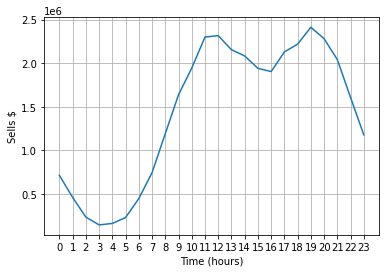

In [157]:
hours = mydf['Hour'].unique()
hours.sort()

plt.plot(hours,mydf.groupby('Hour').sum()['earned_in_day'])
plt.xticks(hours)
plt.grid()
plt.xlabel('Time (hours)')
plt.ylabel('Sells $')
plt.show()

### Question #4 : What products are most often sold together?

In [188]:
df_dplic = mydf[mydf['Order ID'].duplicated(keep=False)]
df_dplic['Grouped'] = df_dplic.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df_dplic = df_dplic[['Order ID', 'Grouped']].drop_duplicates()
df_dplic.head(5)

<ipython-input-188-31077095ff30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dplic['Grouped'] = df_dplic.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [191]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter


count = Counter()

for row in df_dplic['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question #4 : What product sold the most? Why do you think it sold the most?

In [199]:
mydf = mydf.astype({'Quantity Ordered':'float'})

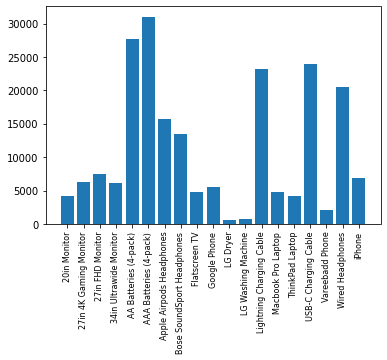

In [201]:
product_group = mydf.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair,x in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-207-3b8dd24658f1>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-207-3b8dd24658f1>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


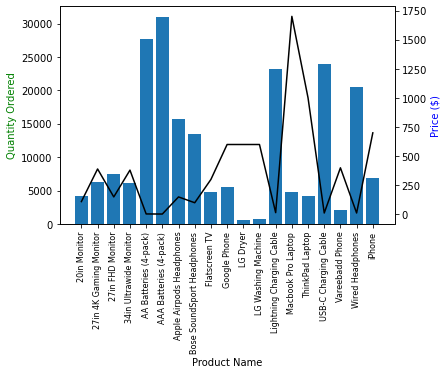

In [207]:
#Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = mydf.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered)
ax2.plot(keys, prices, color='black')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()